<a href="https://colab.research.google.com/github/evgeny-kolonsky/DCmanual/blob/main/Lab2_Magnetic_induction_solution_by_Ron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnetic Induction experiment

by Ron Grikshtas, 2023

commented by Evgeny Kolonsky (EK)

## Theory and basic formulae

In this experiment, we observe and measure the law of Faraday by changing the magnetic flux through a coil using a SmCo magnet dropped through it. The Faraday law is given by

$$\epsilon=-\frac{\rm{d}\Phi_B}{\rm{d}t},$$

where $\epsilon$ is the induced electromotive force (EMF) and $\Phi_B$ is the flux. During a change in the magnetic flux, an azimuthal electric field is developed in the loop (Maxwell-Faraday equation), causing electrons to move and creating  currents whose magnetic field counteracts the change in magnetic flux. Due to finite conductivity $\sigma$ of the material, those currents can never fully cancel the magnetic flux (there is some collisionality between electrons), allowing the magnet to pass through the loop.

To achieve constant conditions in the experiment, we drop our magnet through a copper tube which slows it down using these principles. The magnet eventually achieves terminal velocity $v_T$ due to equilibrium between gravity and EMF applied on it by the tube, which can be seen as consisting from many rings each applying a force of

$$dF=2\pi b v B_\rho^2 \sigma dS,$$

where $b$ is the radius of the ring, $v$ is the velocity of the magnet, $\sigma$ is the conductivity of the ring's material, and $dS$ is the infintesimal length of each loop.

After it exits the tube, its motion between our measuring coils is governed by basic kinematics under gravitational accelaration $g$,

$$h(t)=v_Tt+\frac{1}{2}gt^2.$$

In our analysis, we will divide this relation by $t$ to fit the RHS of the equation using "linregress", and obtain the terminal velocity and gravitational accelaration.

The magnetic field of the magnet is similar to that of a magnetic coil of height $h$ and can be calculated from Biot-Savart law

$$B_z=\frac{\mu_{0}nI}{2}\left(\frac{z+h/2}{\sqrt{\left(z+h/2\right)^{2}+b^{2}}}-\frac{z-h/2}{\sqrt{\left(z-h/2\right)^{2}+b^{2}}}\right)$$

where $z$ is the the location parallel to the normal of the loops, $\mu_0$ is the vacuum permeability, $n$ is the number of winding **per unit length**, and $I$ is the current. For the SmCo magnet, $nI$ is replaced by the magnetization $M$.

The magnetic field induced in the coils can be obtained from measurments of induced flux through integration

$$B_{\text{avg}}\left(t\right)=\frac{1}{Na}\left(-\int_{0}^{t\left(z\right)}\epsilon\left(t^{\prime}\right)\text{d}t^{\prime}\right),$$

where $N$ is the number of windings, $a$ is the cross section of each winding, and $\epsilon$ is flux change measured in oscilloscope.

## Results

To maintain order, I will follow the requirments requested in the lab guidebook.

First we summon all our libraries, define *get_vectors* which reads scope .csv files and returns time and CH1,CH2 vectors (will be useful and help to reduce code repitition), and define constants of experimental system.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import linregress

PATH = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab2_I/'


def get_vectors(fullpath):
    t, X, Y = np.genfromtxt(fullpath, delimiter=',', skip_header=1, unpack=True)
    return t, X, Y

def geometric_factor(z):
    return (z + h/2) / np.sqrt((z + h/2)**2 + b**2) - (z - h/2)/np.sqrt((z - h/2)**2 + b**2)


h = 2e-2 # magnet height, in m
b = 1e-2 # magnet radius, in m
D = 35e-3 # diameter of coils, im m
A = np.pi*(D/2)**2 # area of each winding, in m**2

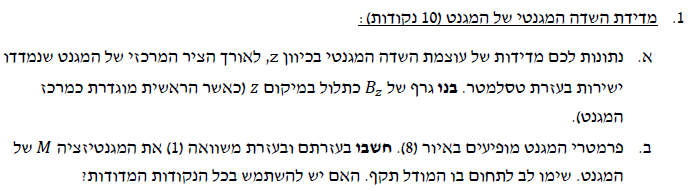

To get $M$, I normalized the measurments given to us by the geometric factor (the round brakets) for that position and $\mu_0/2$ in the equation for $B_z$ presented above. I also present figure of measurments:

Average magnetization calculated to be M=1.1e+06 A/m ± 10%


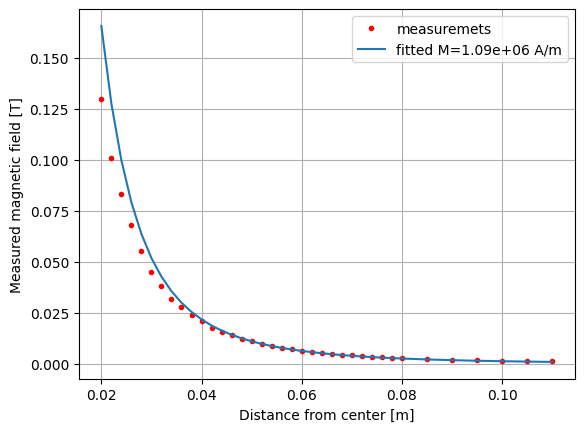

In [ ]:
#%% Estimating SmCo magnet magnitization
mu_0 = scipy.constants.mu_0

filename = 'Magnetic_Field_Measurement.csv'
Z, B =  np.genfromtxt(PATH+filename, skip_header=1, delimiter=',',unpack=True)

plt.plot(Z, B, 'r.', label='measuremets')
plt.xlabel('Distance from center [m]')
plt.ylabel('Measured magnetic field [T]')
plt.grid()
M_vec = B * 2 /mu_0  /geometric_factor(Z) # in A/m
M = np.mean(M_vec)
plt.plot(Z, M * mu_0 /2 *geometric_factor(Z), label=f'fitted M={M:.2e} A/m')
plt.legend()
print(f"Average magnetization calculated to be M={np.mean(M):.1e} A/m ± {np.std(M_vec)/np.mean(M_vec)*100:.0f}%")

The average magnetization I got was $\bar{M}=1.09\times 10^6\  \rm{A/m}$. The error in B is unknown but can be estimated from each regime in the teslameter. The propagating error for $M$ from geometric factor needs to be calculated by definition with derivative using errors in $z$, $b$, $\mu_0$ and $B$, and I didn't want to to do that. This value increases the further we go from the center, up to 30% from the average.

<font color='red'> (EK3) Recalculate magnetization constant using linear regression fit with offset.
</font>

LinregressResult(slope=np.float64(870048.7569879985), intercept=np.float64(2877.0356349158465), rvalue=np.float64(0.9987084114178794), pvalue=np.float64(6.841068325418349e-47), stderr=np.float64(7481.8273065024805), intercept_stderr=np.float64(486.3974989473145))
Average magnetization calculated to be M = 8.7e+05 A/m ± 1%


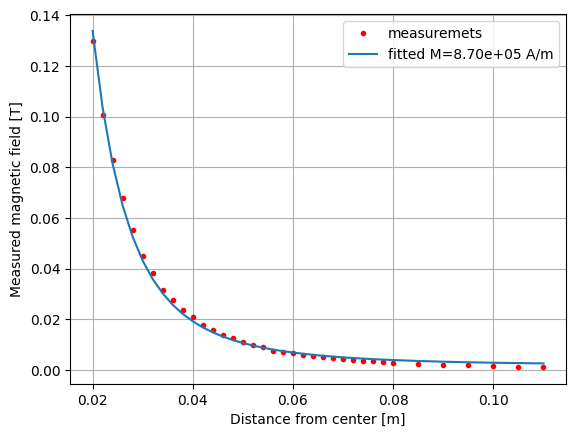

In [ ]:
fit = linregress(geometric_factor(Z), 2 * B / mu_0)
print(fit)
plt.plot(Z, B, 'r.', label='measuremets')
plt.xlabel('Distance from center [m]')
plt.ylabel('Measured magnetic field [T]')
plt.grid()

M = fit.slope
M0 = fit.intercept
M_err = fit.stderr
plt.plot(Z, M * mu_0 /2 *geometric_factor(Z) + M0 *mu_0/2, label=f'fitted M={M:.2e} A/m')
plt.legend()
print(f"Average magnetization calculated to be M = {np.mean(M):.1e} A/m ± {M_err/M*100:.0f}%")



### My attempt to calculate M

For a collection of identical atoms, the magentization $M$ can be estimated as [[1]](https://www.andrew.cmu.edu/user/dl0p/laughlin/pdf/441.pdf)

$$M=n_a\mu_{atom},$$

where $n_a$ is the number of magnetic dipoles in unit volume, and $\mu_{atom}$ is the magnetic moment of a single atom. The structure of SmCo lattice is quite complicated [[2]](https://pubs.acs.org/doi/abs/10.1021/acs.inorgchem.7b02981), but the number of Sm to Co atoms seems to be similar in each lattice cell, so a crude estimation of magnetic moment for this material can be obtained using averaging

$$
\mu_\rm{SmCo}=\frac{\mu_\rm{Sm}+\mu_\rm{Co}}{2},$$


with $\mu_\rm{Sm},\mu_\rm{Co}$ being the moments of samarium and cobalt equaling roughly $1\mu_B$ and $2.2\mu_B$ from ref [2], respectively ($\mu_B$ is the Bohr magneton). The variable $n_a$ can be estimated from density $\rho_\rm{SmCo}$, molar mass $M_\rm{SmCo}$ and Avogadro constant $N_a$

$$n_a=\frac{N_A}{M_\rm{SmCo}}\rho_\rm{SmCo}.$$

The molar mass is taken as sum of a single cell, and density can be obtained from wikipedia page of SmCo magnet

$$M_\rm{SmCo}=M_\rm{Sm}+M_\rm{Co}=150.4+28.01=178.41\ \rm{g/mol}$$

$$N_A=6.022\times 10^{23}$$

$$\rho_\rm{SmCo}=8.2\ \rm{g/cm^{3}}$$

Plugging all constants into the equation for $M$ and being carful with units yields

$$M=4.12\times 10^5\ \rm{T/m}$$

<font color='red'> (EK2) magnetization $M$ units are $\rm{{A/m}}$.
</font>


which is about half of value calculted from direct measurments. Any of the above assumptions should be examined and refined for (potentially) better estimate.

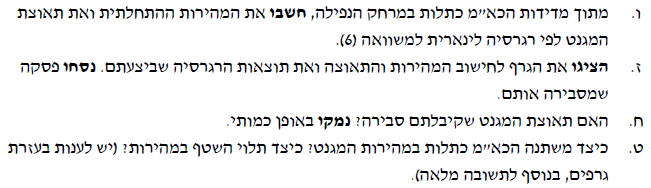

The following code loads each measurment, plots it on the same graph with color map, and measures time difference between maximal flux change in each coil. The difference is then fitted together with recorded height using $h/t=at+b$.

In [ ]:
#%% Analyse magnet terminal velocity & accelaration (section 1)
# measurements performed, given in format [#, h, +-n] (- for magnet facing up)
# measurments 0-5 refer to section 3, and 6-17 to section 4
measurements = '''
0 25 +50
1 25 -50
2 25 +20
3 25 -20
4 25 +10
5 25 -10
6 10 50
7 15 50
8 20 50
9 25 50
10 30 50
11 35 50
12 40 50
13 45 50
14 50 50
15 55 50
16 60 50
17 62.5 50
'''
data_info = np.genfromtxt(measurements.splitlines())

t_fall = [] # time difference between max flux in coils, in s
colors = plt.cm.rainbow(np.linspace(0, 1, 18)) # makes rain gradient for plots
fig1 = plt.figure(dpi=300)
for n in range(6, 18, 1):
    t, X, Y = get_vectors('Inductance\Trace %d.csv'%int(n))
    t = t - t[np.argmax(X)] # time start on coil A maximum flux
    X = 10*(X - np.mean(X[-10:])) # normalized A coil data
    Y = Y - np.mean(Y[-10:])
    plt.plot(t, X, color=colors[n])
    plt.plot(t, Y, color=colors[n], label = f"h={data_info[n,1]} cm")
    t_fall = np.append(t_fall, t[np.argmax(Y)])

plt.xlabel('Time [s]')
plt.ylabel('Voltage*10 (coil A) / Voltage (coil B) [V]')
plt.xlim([-0.5, 0.5])
plt.grid()
plt.legend()

# plotting (h/t)=f(t) and its fit
h = data_info[range(6, 18, 1), 1] * 1e-2 # in m
reg =  linregress(t_fall,h/t_fall)
a = reg.slope
b = reg.intercept
fig1 = plt.figure(dpi=300)
plt.plot(t_fall, h/t_fall, 'r.', label="Measurement")
plt.plot(t_fall, a*t_fall + b, 'b', label="Fit")
plt.xlabel('Time between max flux change [s]')
plt.ylabel('h/t [m/s]')
plt.legend()
plt.grid()

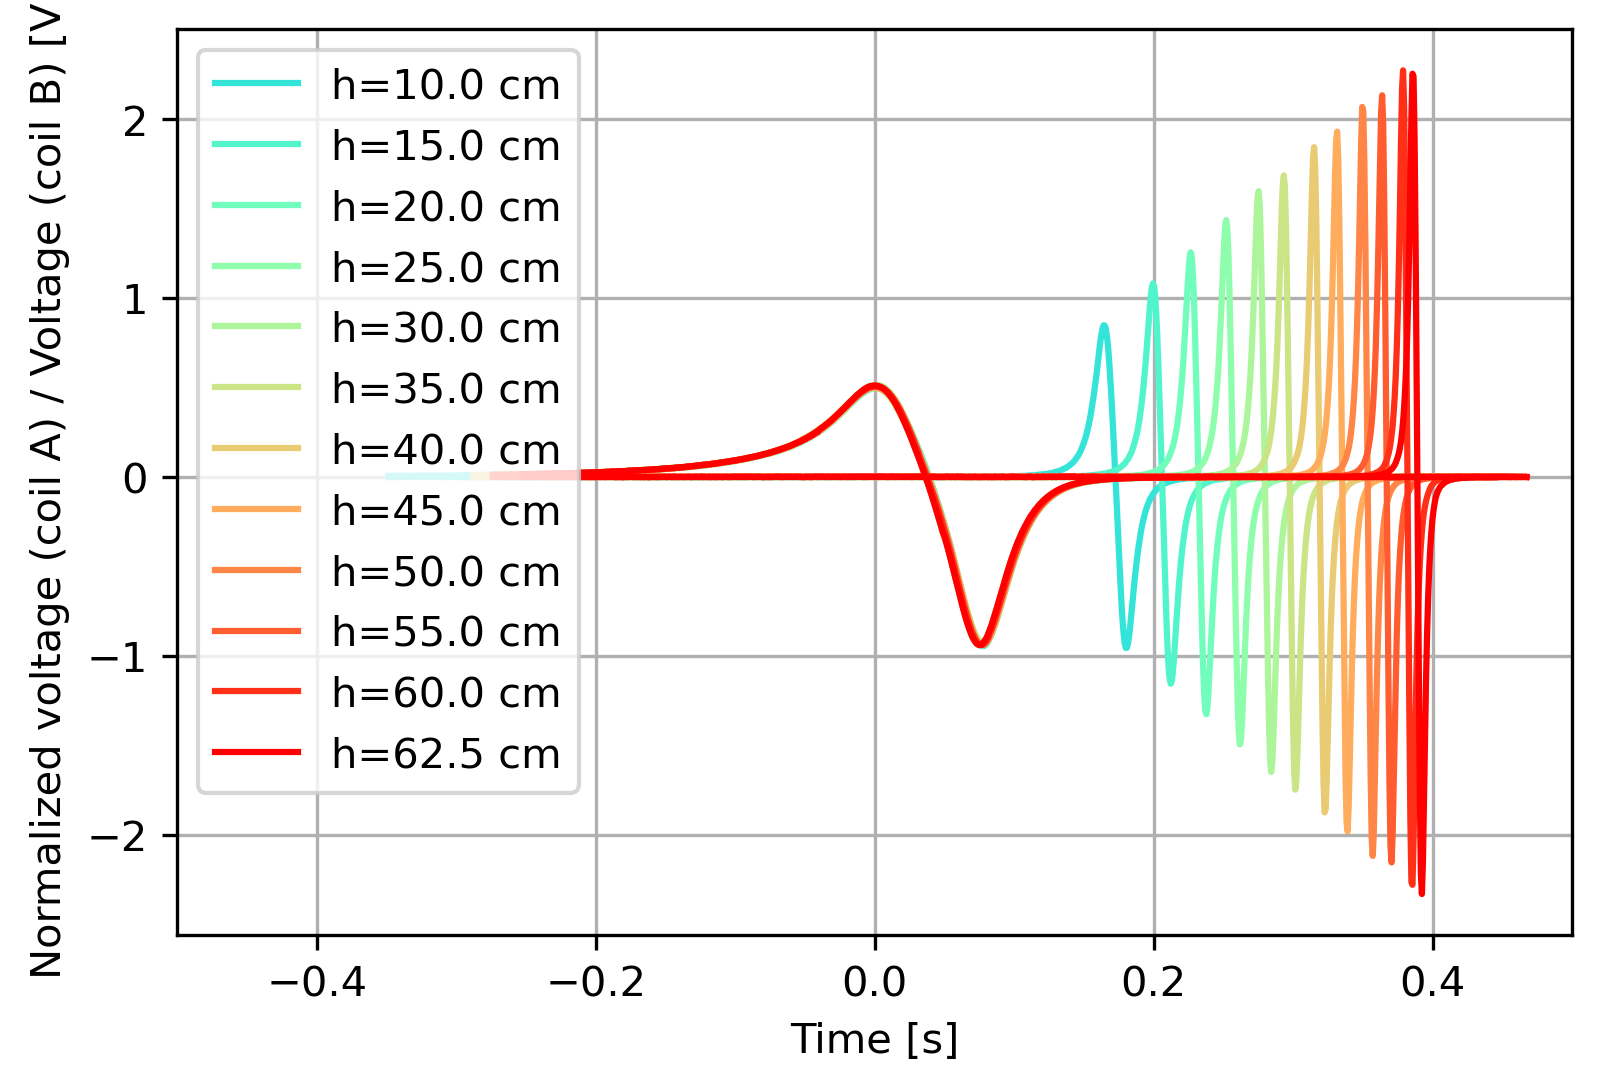
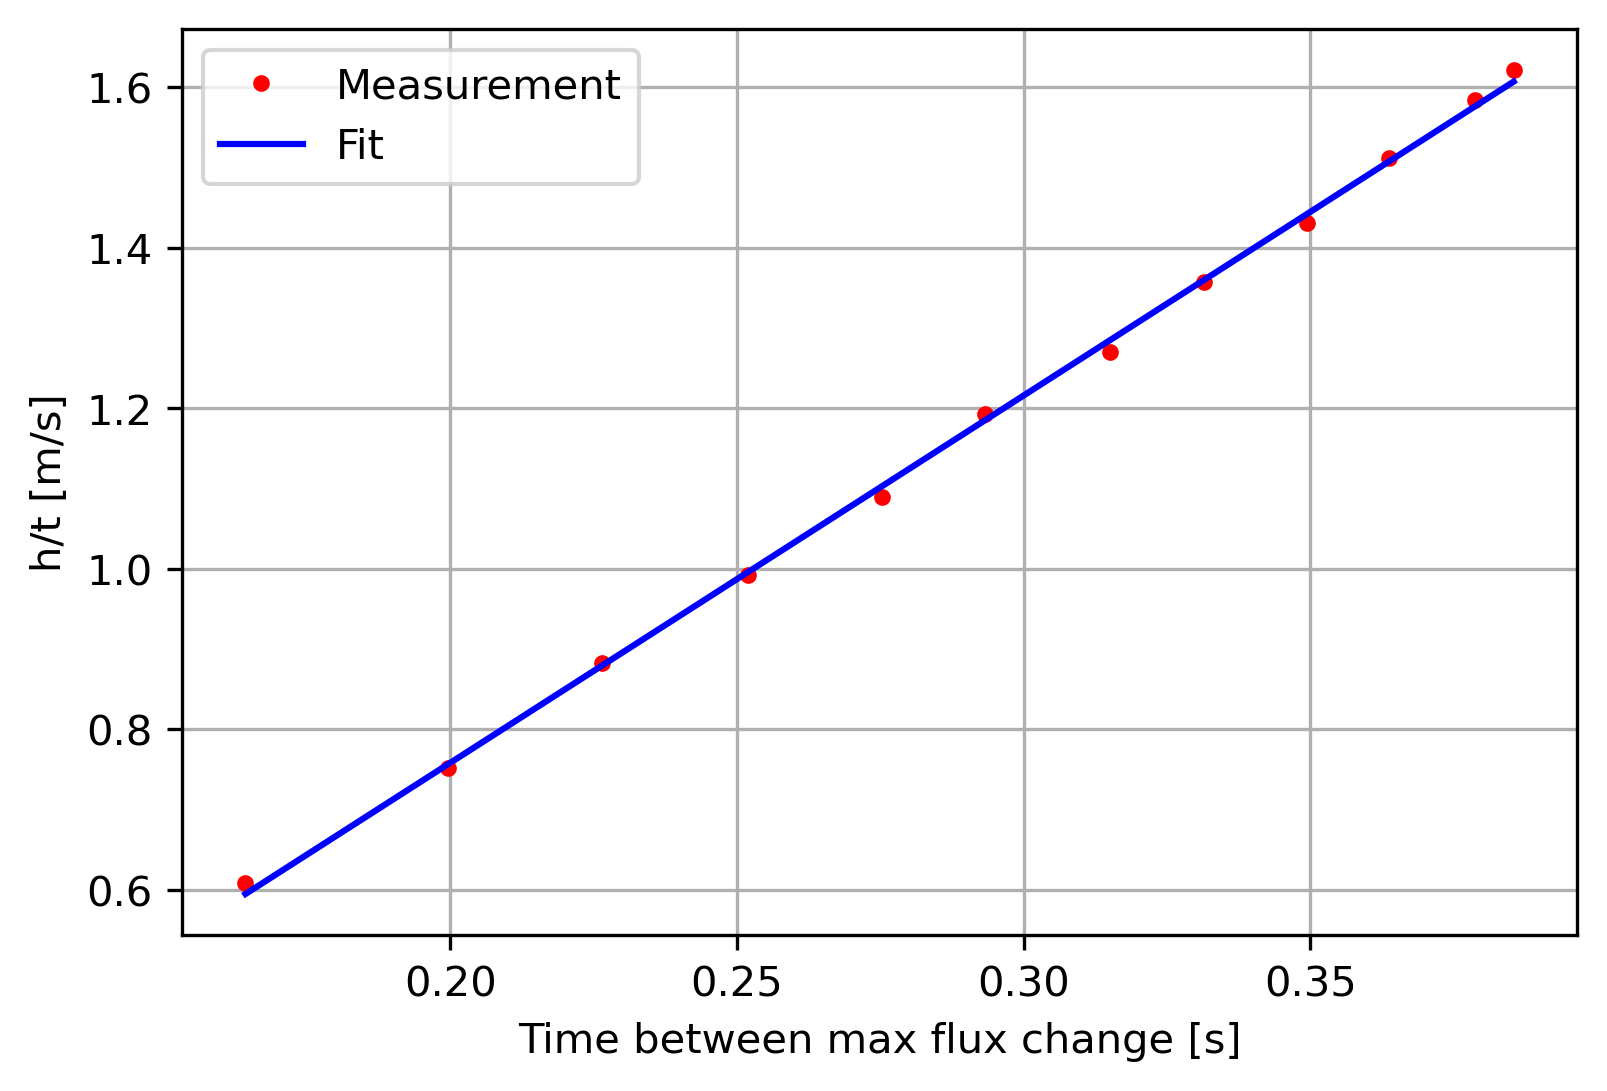

In the first plot, we can see expected behavior of linearly increasing flux change, which is expected from the expression of $dF$. Additionally, all coil A (top coil) are similar which is importent because we want similar starting condition for reproducability.

The fit gives $a=4.58\pm0.04\ \rm{m/s^2}$, whereas $g/2=4.9\ \rm{m/s^2}$ is expected, meaning the accelaration is reasonable but not quite what we expect, given the accurate nature of this experiment. Additionally, I got $b=v_T=-0.15\pm0.01\ \rm{m/s}$, which means the magnet was moving upwards (both $a$ and $b$ should be the same sign). I do not know what is the source of this error.

<font color='red'> (EK4) We discussed with Ron and found reasonable explanation: probably initial velocity is not correct due to the systematic shift in heights.  
</font>

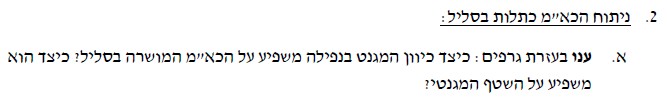

The following code creates the graphs for a:

In [ ]:
#%% Analysing qualitative behavior (section 2 a,b)
# Affect of magnet orientation on EMF and magnetic field

t, X, Y = get_vectors('Inductance\Trace 0.csv')
t = t - t[np.argmax(X)]
Y = Y - np.mean(Y[-10:])
B_down = (-50*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)

fig = plt.figure(dpi=300)
plt.plot(t, X, 'r', label='Magnet facing down, coil A')
plt.plot(t, Y, 'b', label='Magnet facing down, coil B')

t, X, Y = get_vectors('Inductance\Trace 1.csv')
t = t - t[np.argmax(-X)]
Y = Y - np.mean(Y[-10:])
B_up = (-50*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)

plt.plot(t, X, 'g', label='Magnet facing up, coil A')
plt.plot(t, Y, 'c', label='Magnet facing up, coil B')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.grid()

# Plot magnetic field
fig = plt.figure(dpi=300)
plt.plot(t, B_down, 'r', label='Magnet facing down')
plt.plot(t, B_up, 'b', label='Magnet facing up')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic field [T]')
plt.legend()
plt.grid()


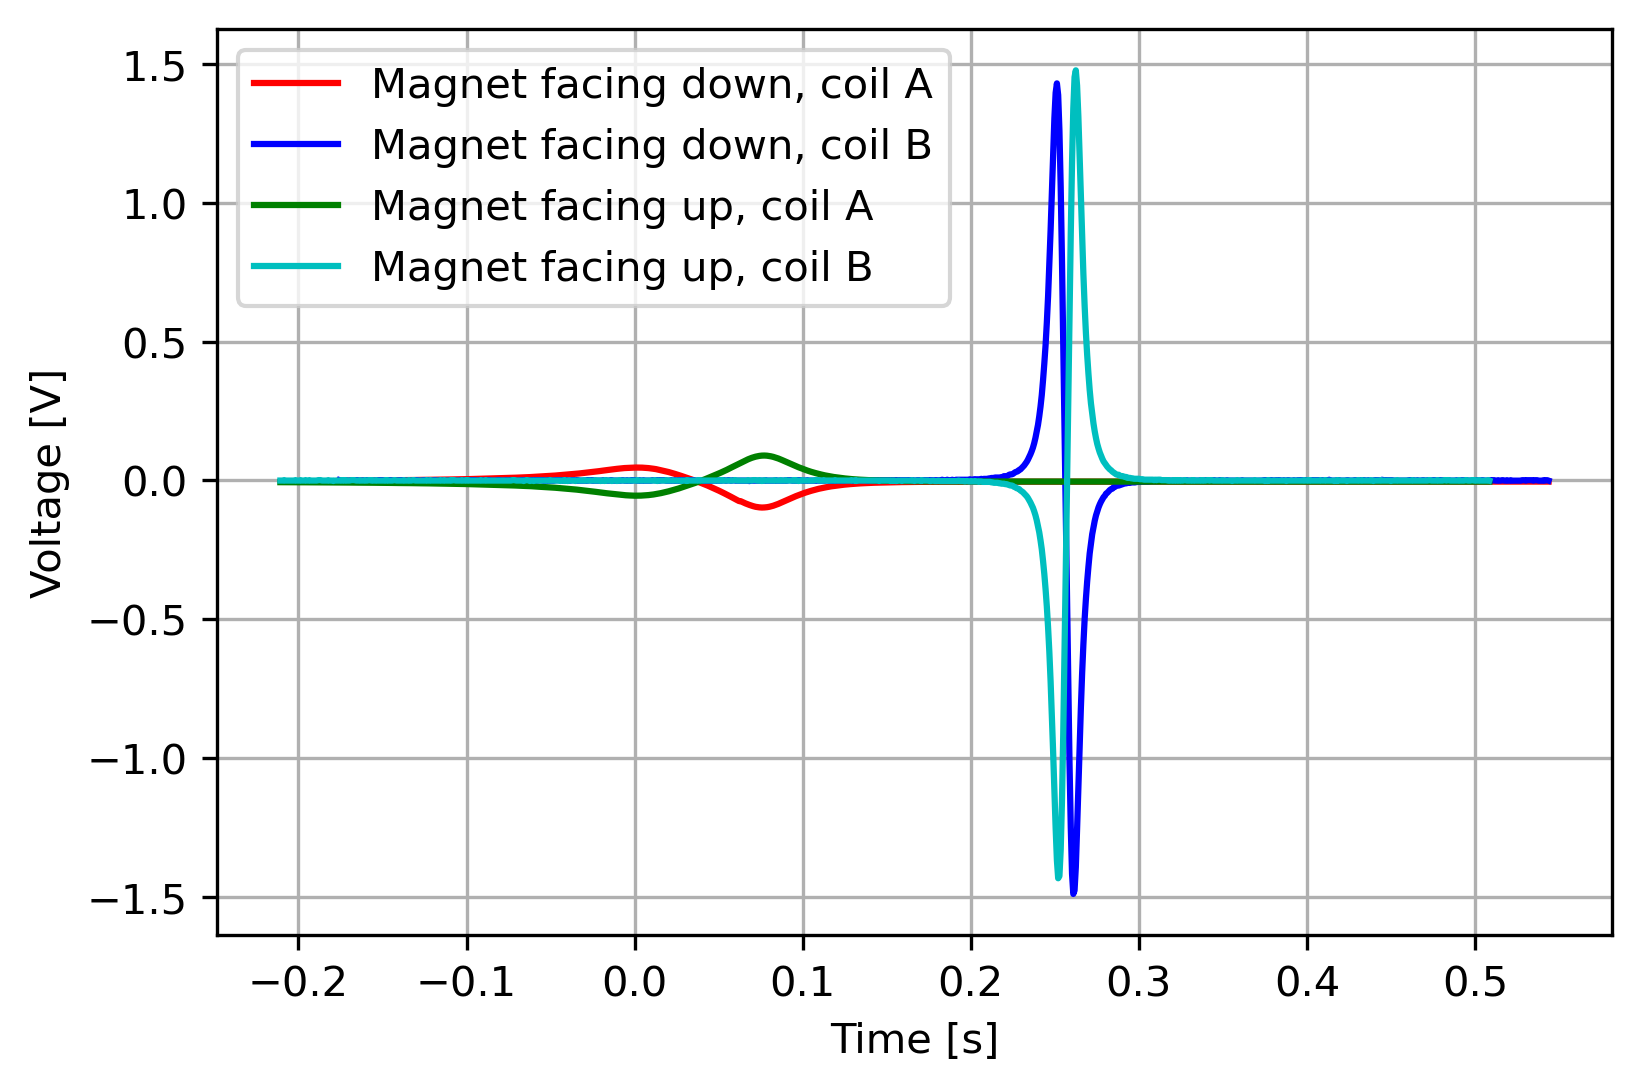
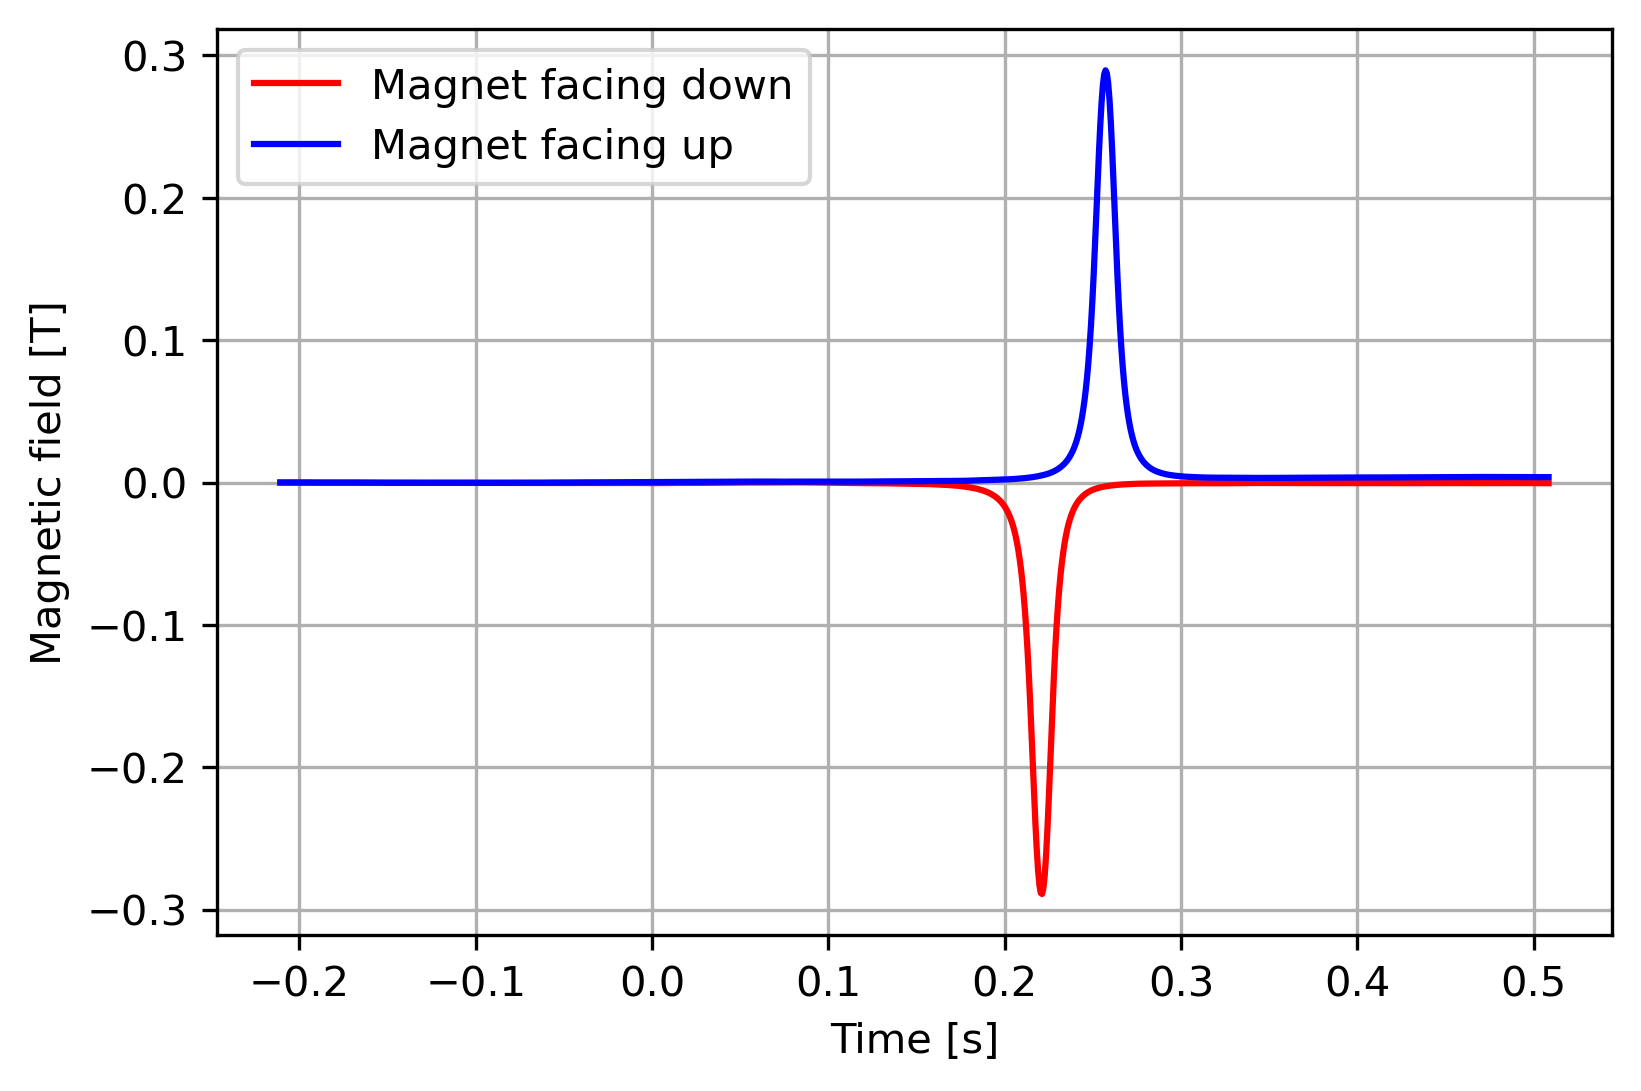

These are expected results - if the magnet is falling facing down, the magnetic flux inside the loop will increase, so the induced magnetic field will be negative to cancel that, and vice versa for magnet facing up.

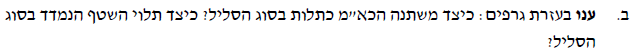

For section b (changing windings number):

In [ ]:
#%% Affect of winding on EMF and magnetic flux

t, X, Y = get_vectors('Inductance\Trace 0.csv')
t = t - t[np.argmax(X)]
Y = Y - np.mean(Y[:50])
print(Y[np.argmax(Y)])
B_50 = (-50*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)
fig = plt.figure(dpi=300)
plt.plot(t, Y, 'r', label='50 windings, coil B')

t, X, Y = get_vectors('Inductance\Trace 2.csv')
t = t - t[np.argmax(X)]
Y = Y - np.mean(Y[:500])
print(Y[np.argmax(Y)])
B_20 = (-20*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)
plt.plot(t, Y, 'b', label='20 windings, coil B')

t, X, Y = get_vectors('Inductance\Trace 4.csv')
t = t - t[np.argmax(X)]
Y = Y - np.mean(Y[:500])
print(Y[np.argmax(Y)])
B_10 = (-10*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)
plt.plot(t, Y, 'g', label='10 windings, coil B')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([0.22, 0.3])
plt.legend()
plt.grid()

# Plot magnetic field
fig = plt.figure(dpi=300)
plt.plot(t, B_50, 'r', label='50 windings, coil B')
plt.plot(t, B_20, 'b', label='20 windings, coil B')
plt.plot(t, B_10, 'g', label='10 windings, coil B')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic field [T]')
plt.legend()
plt.grid()


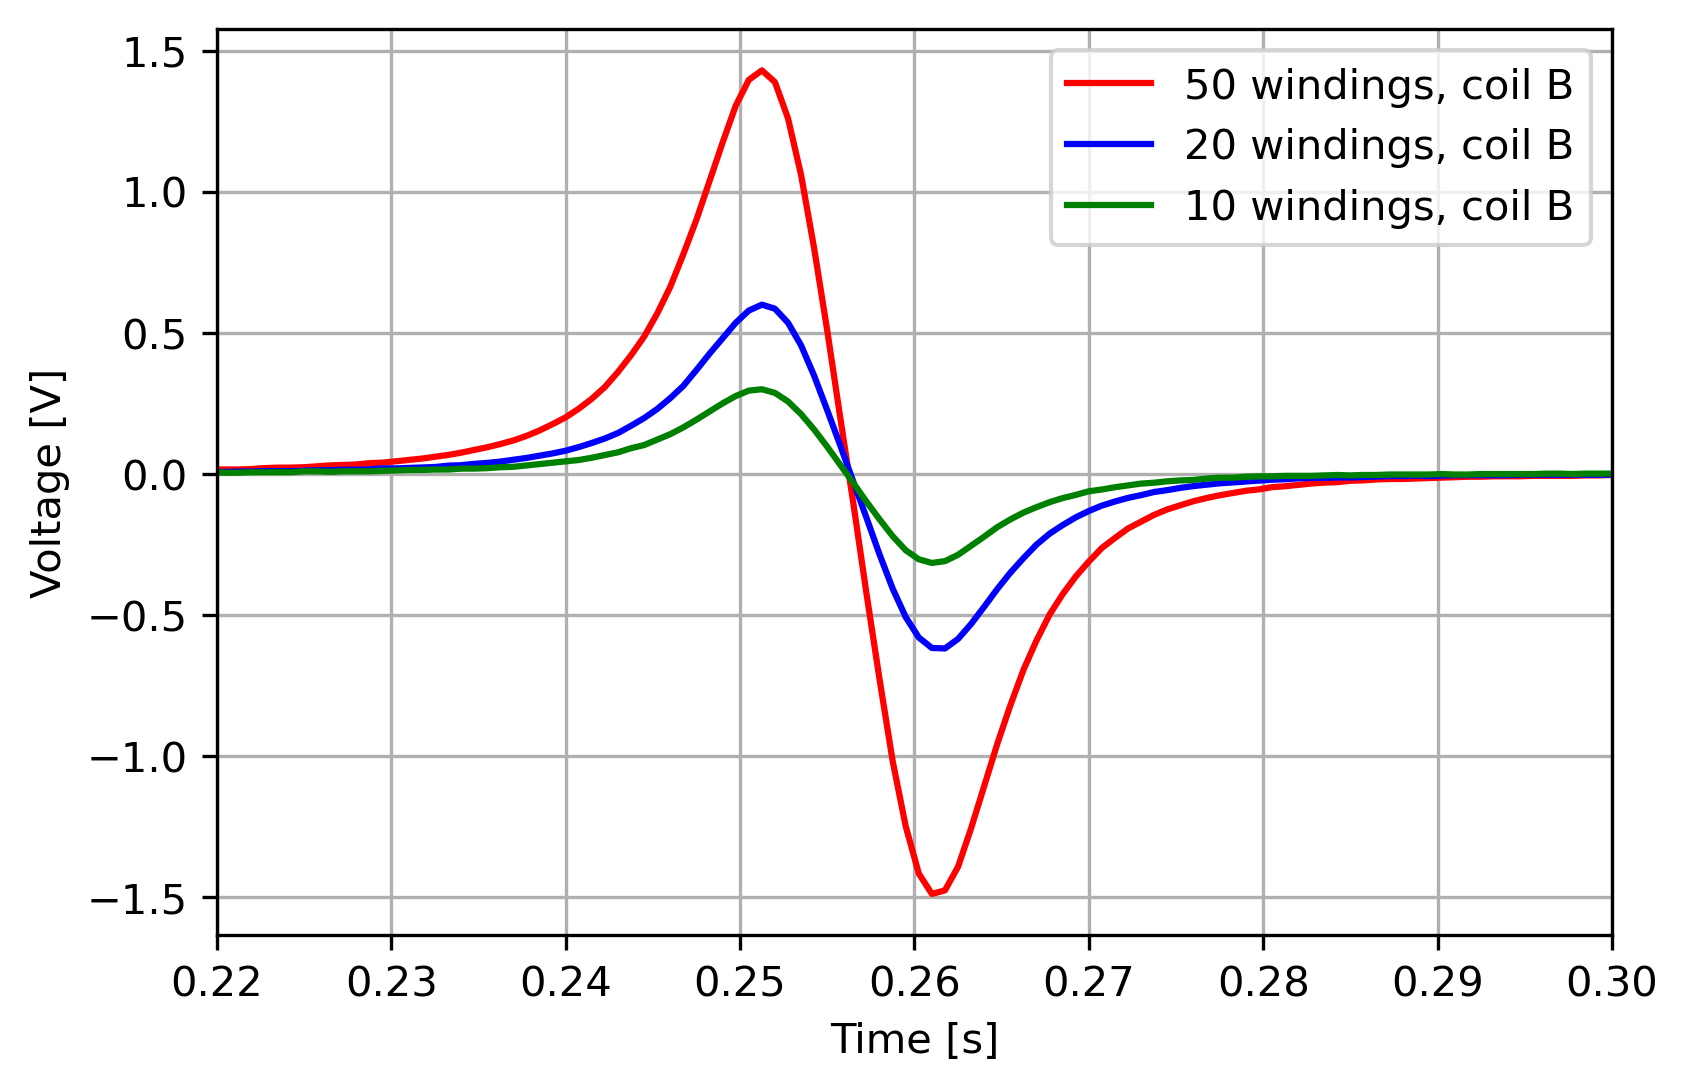
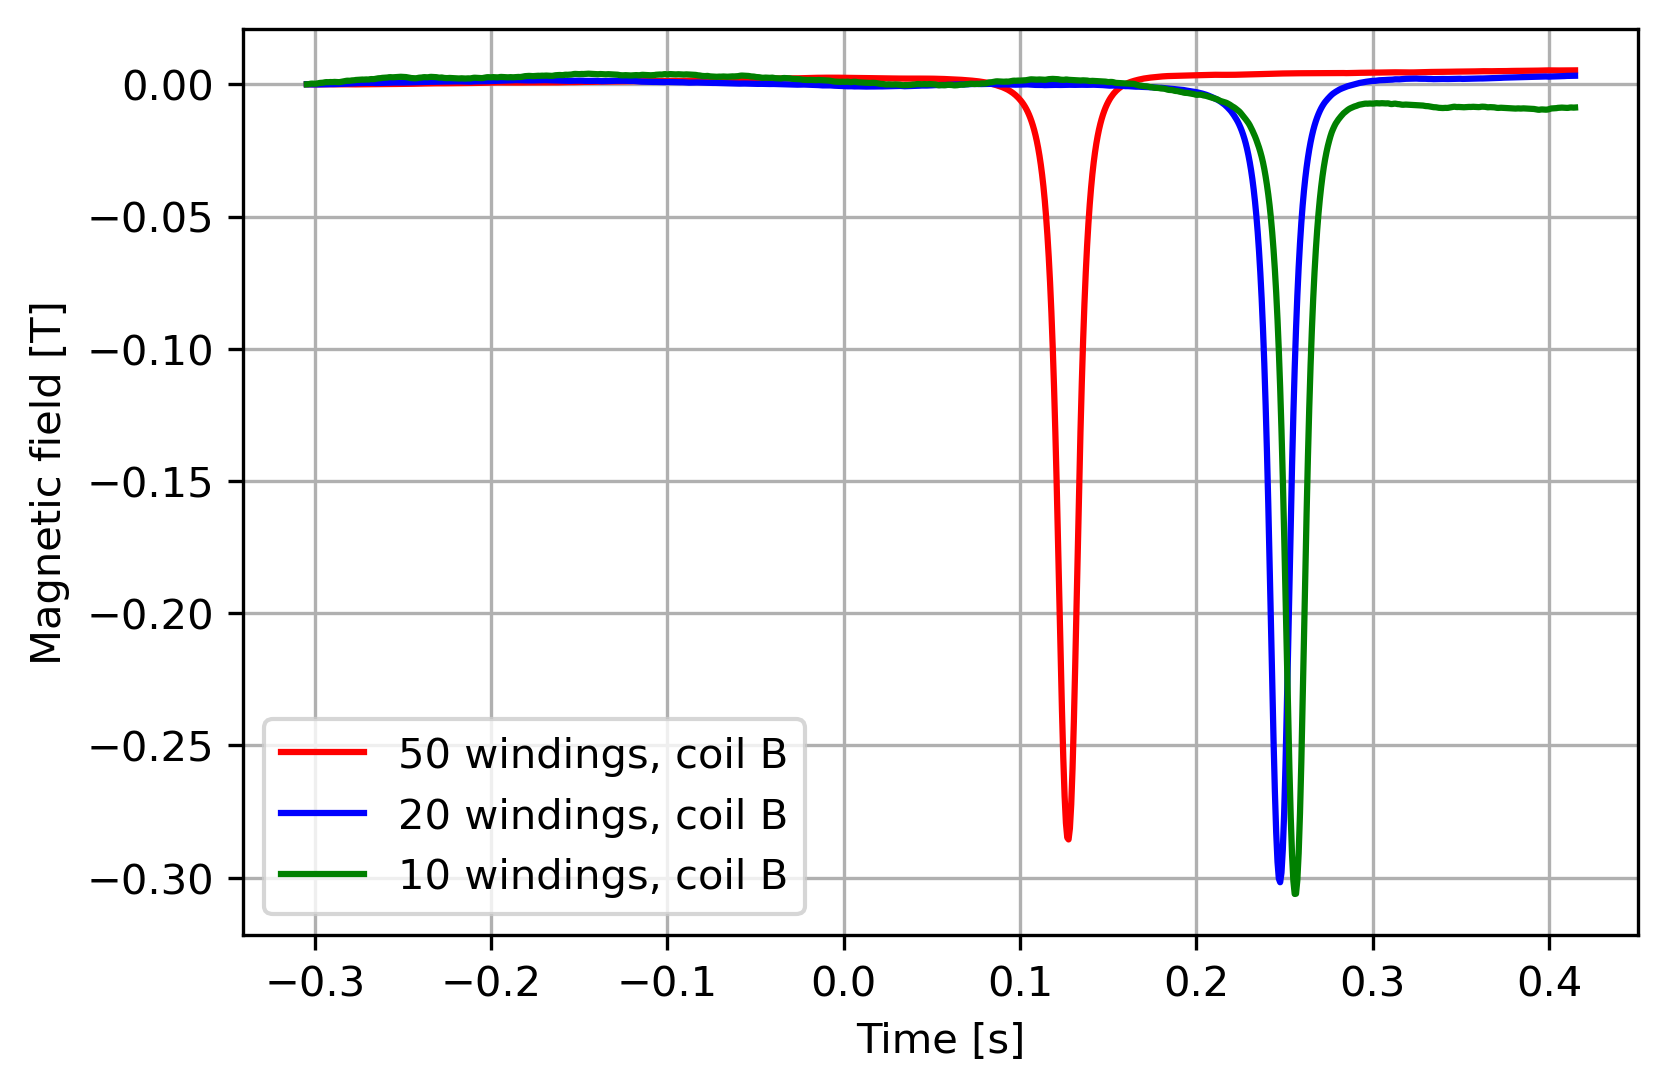

In the induced flux plot, the max flux ratio roughly corresponds to the ratio between number of windings (1.43:0.6:0.3 Volts for 50:20:10 windings), corresponding to $dF$ expression.

The calculated magnetic field demonstrates similar fields generated for different windings. One might notice that lower winding number resulted in "noisier" plot, which I attempted in to correct in the code by subtracting a larger average from 10 and 20 windings plots (mean of 500 first points was subtracted).


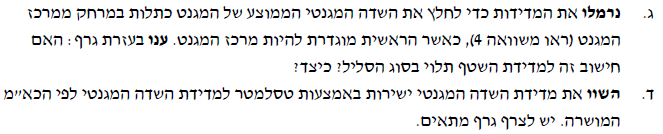

Using previous fitted $a$ and $b$ constants, I converted the time axis from $h=25\ cm, n=+50$ voltage measurment into $z$, offset it to max flux, and plotted given teslameter magnetic field on top:

In [ ]:
#%% Comparing magnetic field from experiment vs teslameter
# choosing measurement with h=25 cm and 50 windings
t, X, Y = get_vectors('Inductance\Trace 0.csv')
t = t - t[np.argmax(X)]
Z = (b*t + a*t**2)*(-1)
Y = Y - np.mean(Y[:100])
B_experiment = (-50*A)**(-1)*scipy.integrate.cumtrapz(Y, x = t,initial = 0)*(-1)
Z = Z - Z[np.argmax(B_experiment)]
fig = plt.figure(dpi=300)
plt.plot(Z, B_experiment, 'b', label="Experiment")
plt.xlim([0, 0.1])
data = pd.read_csv('Magnetic_Field_Measurement.csv')
Z_meas = np.array(data['Z [m]']) # in m
B_meas = np.array(data['B [T]']) # in T
plt.plot(Z_meas, B_meas, 'r.', label="Teslameter")

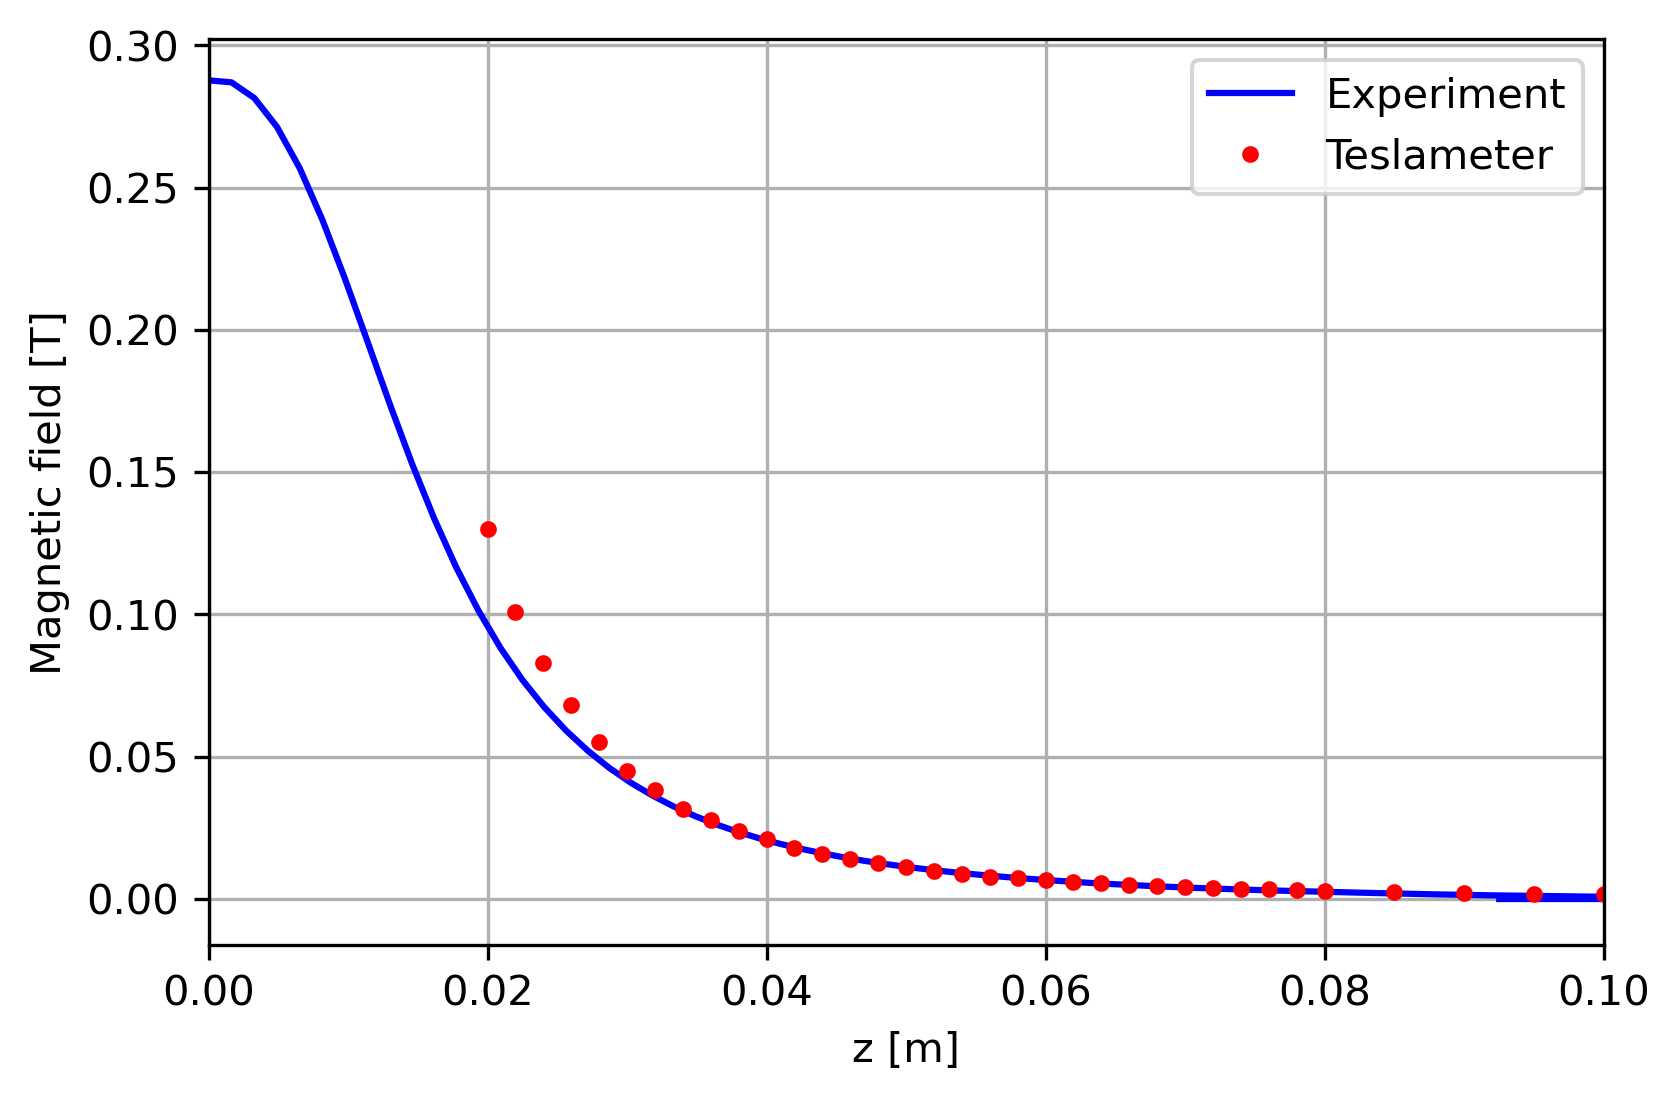

The experiment fits nicely with teslameter measurments up to about $0.35m$, where they start to diverge from one another. I suspect the values of $a,b$ could be tweaked to provide a better fit, but I haven't been able to do it.